In [1]:
import numpy as np
import pandas as pd

In [40]:
import numpy as np
from matplotlib import pyplot as plt, animation

In [41]:
from IPython.display import Video

In [3]:
import os
import glob 

In [5]:
from celluloid import Camera

In [47]:
data_home_dir = '../results/'

In [48]:
folder_name = os.path.join(data_home_dir, sorted(os.listdir(data_home_dir))[-1])

In [49]:
file_names = sorted(os.listdir(folder_name), key=lambda x: int(x.split('_')[1].split('.txt')[0]))

In [50]:
datas = []
for file_name in file_names:
    datas.append(pd.read_csv(os.path.join(folder_name, file_name)))

In [51]:
def get_data(i):
    data = datas[i][' probability'].to_numpy().reshape((256,256))
    X = datas[i]['x'].to_numpy().reshape((256,256))
    Y = datas[i][' y'].to_numpy().reshape((256,256))
    return X, Y, data

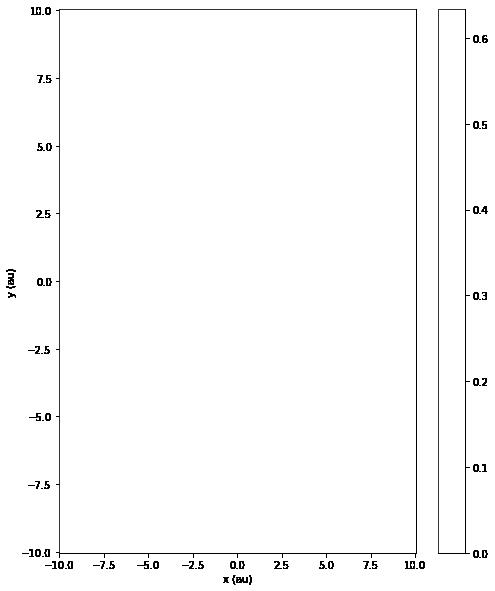

In [45]:
fig = plt.figure(figsize=(10, 8))
camera = Camera(fig)
cbar = None
for i in range(1, len(datas)):
    ax = fig.add_subplot()
    ax.set_xlabel('x (au)')
    ax.set_ylabel('y (au)')
    p = ax.pcolormesh(*get_data(i))
    cbar = plt.colorbar(p, ax=ax)
    camera.snap()
animation = camera.animate(interval=20, blit=True)

In [46]:
animation.save(
    'plots.mp4',
    dpi=200,
    savefig_kwargs={
        'pad_inches': 'tight'
    }
)

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1600x2000', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'plots.mp4']' returned non-zero exit status 255.

In [ ]:
Video('plots.mp4')